### Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import os
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('../Data/Dataset_ecommerce.csv')
data.head(10)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda
5,536365,2010-12-01 08:26:00,17850.0,SC7895,Toys,41,45.31,Sierra Leone
6,536365,2010-12-01 08:26:00,17850.0,SC8608,Books,44,39.31,Benin
7,536366,2010-12-01 08:28:00,17850.0,SC3216,Toys,47,77.35,Burkina Faso
8,536366,2010-12-01 08:28:00,17850.0,SC1236,Kitchenware,19,35.11,Nigeria
9,536367,2010-12-01 08:34:00,13047.0,SC4513,Furniture,55,3.21,Cote d'Ivoire


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   InvoiceDate  541909 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    541909 non-null  object 
 4   Description  541909 non-null  object 
 5   Quantity     541909 non-null  int64  
 6   UnitPrice    541909 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
data.describe()

,CustomerID,Quantity,UnitPrice
count,406829.000000,541909.000000,541909.000000
mean,15287.690570,50.534748,50.476354
std,1713.600303,28.849367,28.564775
min,12346.000000,1.000000,1.000000
25%,13953.000000,26.000000,25.750000
50%,15152.000000,51.000000,50.430000
75%,16791.000000,76.000000,75.180000
max,18287.000000,100.000000,100.000000


In [6]:
data.describe(include= 'O')

,InvoiceNo,InvoiceDate,StockCode,Description,Country
count,541909,541909,541909,541909,541909
unique,25900,23260,9000,10,28
top,573585,2011-10-31 14:41:00,SC2014,Sports Equipment,Cote d'Ivoire
freq,1114,1114,96,54765,19651


In [7]:
#Checking Missing data
data[data["CustomerID"].isna()].head(10)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
622,536414,2010-12-01 11:52:00,NaN,SC7308,Kitchenware,93,62.55,Senegal
1443,536544,2010-12-01 14:32:00,NaN,SC3127,Toys,86,22.90,Burkina Faso
1444,536544,2010-12-01 14:32:00,NaN,SC3641,Kitchenware,7,72.45,Nigeria
1445,536544,2010-12-01 14:32:00,NaN,SC5252,Cosmetics,39,32.46,Ghana
1446,536544,2010-12-01 14:32:00,NaN,SC1375,Toys,39,3.12,South Africa
1447,536544,2010-12-01 14:32:00,NaN,SC8920,Books,25,75.53,Algeria
1448,536544,2010-12-01 14:32:00,NaN,SC6558,Furniture,85,34.28,Sudan
1449,536544,2010-12-01 14:32:00,NaN,SC3207,Furniture,40,89.41,Cote d'Ivoire
1450,536544,2010-12-01 14:32:00,NaN,SC4675,Sports Equipment,68,60.70,Sudan
1451,536544,2010-12-01 14:32:00,NaN,SC1904,Sports Equipment,33,61.02,Mozambique


In [8]:
data.isna().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [9]:
#Droping missing value in customerID
data = data.dropna(subset=["CustomerID"])

In [10]:
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   StockCode    406829 non-null  object        
 4   Description  406829 non-null  object        
 5   Quantity     406829 non-null  int64         
 6   UnitPrice    406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [12]:
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [13]:
#To know the length of data loss due to cleaning
len(data)

406829

### Feature Engineering

In [15]:
#convert customerID from float to integer
data['CustomerID'] = data['CustomerID'].astype(int)

In [16]:
data["TotalPrice"] = data["UnitPrice"] * data["Quantity"]

In [17]:
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,TotalPrice
0,536365,2010-12-01 08:26:00,17850,SC1734,Electronics,65,10.23,Egypt,664.95
1,536365,2010-12-01 08:26:00,17850,SC2088,Furniture,95,19.61,Mali,1862.95
2,536365,2010-12-01 08:26:00,17850,SC3463,Books,78,61.49,Mali,4796.22
3,536365,2010-12-01 08:26:00,17850,SC6228,Toys,15,24.73,South Africa,370.95
4,536365,2010-12-01 08:26:00,17850,SC2149,Toys,50,38.83,Rwanda,1941.50


In [18]:
#Aggregating by grouping and computing into Recency,Frequency and monetary value

aggregated_data = data.groupby(by="CustomerID", as_index=False) \
    .agg(
        MonetaryValue=("TotalPrice", "sum"),
        Frequency=("InvoiceNo", "nunique"),
        LastInvoiceDate=("InvoiceDate", "max")
    )

In [19]:
aggregated_data.head(5)

,CustomerID,MonetaryValue,Frequency,LastInvoiceDate
0,12346,5342.40,2,2011-01-18 10:17:00
1,12347,431501.00,7,2011-12-07 15:52:00
2,12348,82378.47,4,2011-09-25 13:13:00
3,12349,176075.12,1,2011-11-21 09:51:00
4,12350,48173.37,1,2011-02-02 16:01:00


In [20]:
#To get our Recency Feature
max_invoice_data = aggregated_data["LastInvoiceDate"].max()

max_invoice_data


Timestamp('2011-12-09 12:50:00')

In [21]:
#Recency measure in days

aggregated_data["Recency"] = (max_invoice_data - aggregated_data["LastInvoiceDate"]).dt.days
aggregated_data.head(5)

,CustomerID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346,5342.40,2,2011-01-18 10:17:00,325
1,12347,431501.00,7,2011-12-07 15:52:00,1
2,12348,82378.47,4,2011-09-25 13:13:00,74
3,12349,176075.12,1,2011-11-21 09:51:00,18
4,12350,48173.37,1,2011-02-02 16:01:00,309


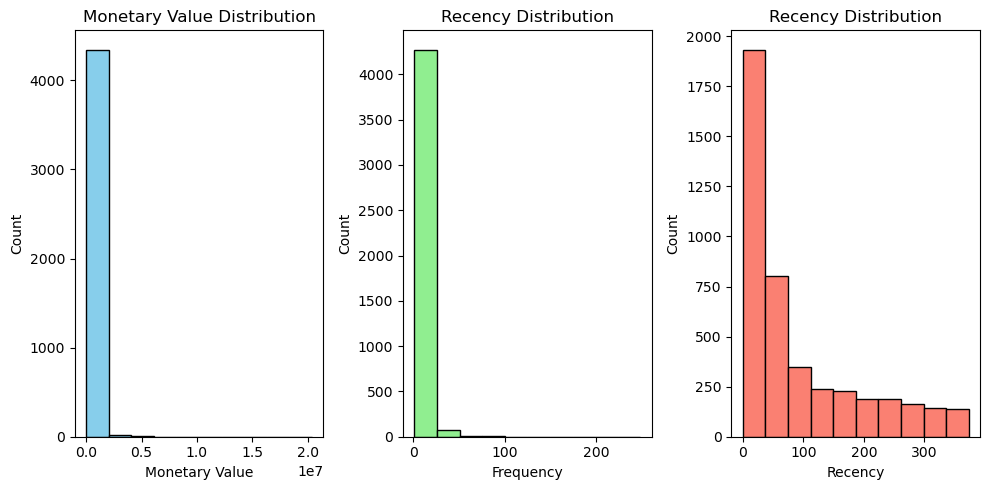

In [22]:
#Looking at the distribution of the features to see whether there are outliers in our dataset using Histogram

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_data["MonetaryValue"], bins=10, color='skyblue', edgecolor='black')
plt.xlabel("Monetary Value")
plt.ylabel('Count')
plt.title('Monetary Value Distribution')

plt.subplot(1, 3, 2)
plt.hist(aggregated_data["Frequency"], bins=10, color='lightgreen', edgecolor='black')
plt.xlabel("Frequency")
plt.ylabel('Count')
plt.title('Recency Distribution')

plt.subplot(1, 3, 3)
plt.hist(aggregated_data["Recency"], bins=10, color='salmon', edgecolor='black')
plt.xlabel("Recency")
plt.ylabel('Count')
plt.title('Recency Distribution')

plt.tight_layout()
plt.show()

### Addressing Outliers

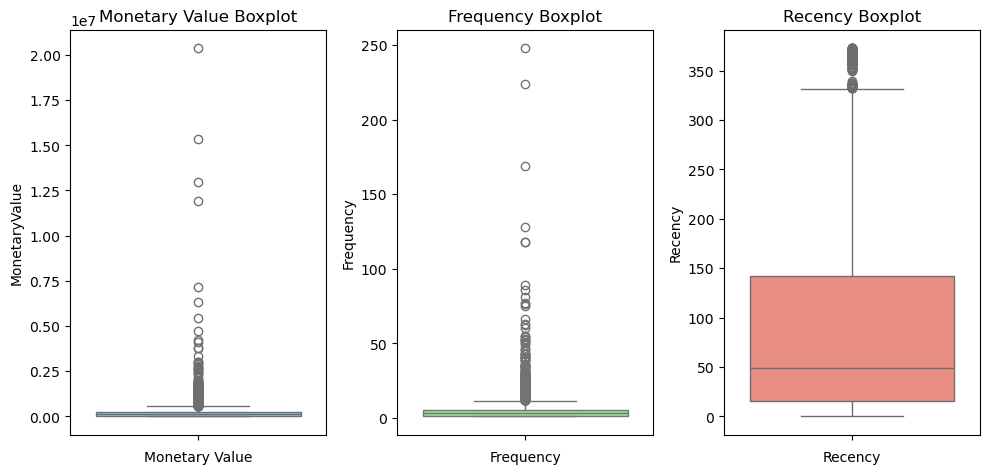

In [24]:
#Using box plot for outlier detection 

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
sns.boxplot(aggregated_data["MonetaryValue"], color='skyblue')
plt.xlabel("Monetary Value")
plt.title('Monetary Value Boxplot')

plt.subplot(1, 3, 2)
sns.boxplot(aggregated_data["Frequency"], color='lightgreen')
plt.xlabel("Frequency")
plt.title('Frequency Boxplot')

plt.subplot(1, 3, 3)
sns.boxplot(aggregated_data["Recency"], color='salmon')
plt.xlabel("Recency")
plt.title('Recency Boxplot')

plt.tight_layout()
plt.show()

In [25]:
#To get ride of our outliers we will establish our quantile using inter quantile range method

M_Q1 = aggregated_data["MonetaryValue"].quantile(0.25)
M_Q3 = aggregated_data["MonetaryValue"].quantile(0.75)
M_IQR = M_Q3 - M_Q1

#To seperate out our outliers
monetary_outliers_data = aggregated_data[(aggregated_data["MonetaryValue"] > (M_Q3 + 1.5 * M_IQR)) | (aggregated_data["MonetaryValue"] < (M_Q1 - 1.5 * M_IQR))].copy()
monetary_outliers_data.describe()


,CustomerID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,389.000000,3.890000e+02,389.000000,389,389.000000
mean,15346.498715,1.241522e+06,19.753213,2011-11-20 23:10:26.838046208,18.084833
min,12359.000000,5.851965e+05,1.000000,2011-02-10 14:38:00,0.000000
25%,14040.000000,6.977978e+05,8.000000,2011-11-17 09:51:00,3.000000
50%,15356.000000,8.691067e+05,13.000000,2011-11-30 11:32:00,9.000000
75%,16873.000000,1.198462e+06,22.000000,2011-12-06 12:27:00,22.000000
max,18283.000000,2.038383e+07,248.000000,2011-12-09 12:49:00,301.000000
std,1723.167891,1.640194e+06,24.208731,NaN,29.398094


In [26]:
F_Q1 = aggregated_data["Frequency"].quantile(0.25)
F_Q3 = aggregated_data["Frequency"].quantile(0.75)
F_IQR = F_Q3 - F_Q1

#To seperate out our outliers
frequency_outliers_data = aggregated_data[(aggregated_data["Frequency"] > (F_Q3 + 1.5 * F_IQR)) | (aggregated_data["Frequency"] < (F_Q1 - 1.5 * F_IQR))].copy()
frequency_outliers_data.describe()


,CustomerID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,397.000000,3.970000e+02,397.000000,397,397.000000
mean,15196.433249,1.010257e+06,23.758186,2011-11-23 03:37:15.264483840,15.919395
min,12362.000000,2.837063e+04,12.000000,2011-02-10 14:38:00,0.000000
25%,13756.000000,3.981096e+05,14.000000,2011-11-20 13:20:00,2.000000
50%,15046.000000,6.711158e+05,17.000000,2011-12-01 12:39:00,8.000000
75%,16722.000000,1.077221e+06,26.000000,2011-12-07 09:02:00,18.000000
max,18283.000000,2.038383e+07,248.000000,2011-12-09 12:49:00,301.000000
std,1758.862785,1.681644e+06,22.669161,NaN,30.751424


In [27]:
non_outliers_data = aggregated_data[(~aggregated_data.index.isin(monetary_outliers_data.index)) & (~aggregated_data.index.isin(frequency_outliers_data.index))]
non_outliers_data.describe()

,CustomerID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3808.000000,3808.000000,3808.000000,3808,3808.000000
mean,15301.186975,129036.389945,3.025473,2011-08-29 06:54:39.264705792,101.720588
min,12346.000000,17.360000,1.000000,2010-12-01 09:53:00,0.000000
25%,13807.750000,37232.780000,1.000000,2011-06-27 12:43:45,21.000000
50%,15306.500000,85113.525000,2.000000,2011-10-10 13:36:00,59.000000
75%,16776.250000,182699.185000,4.000000,2011-11-17 13:32:45,164.250000
max,18287.000000,583845.210000,11.000000,2011-12-09 12:50:00,373.000000
std,1720.208044,123559.002262,2.357832,NaN,103.093859


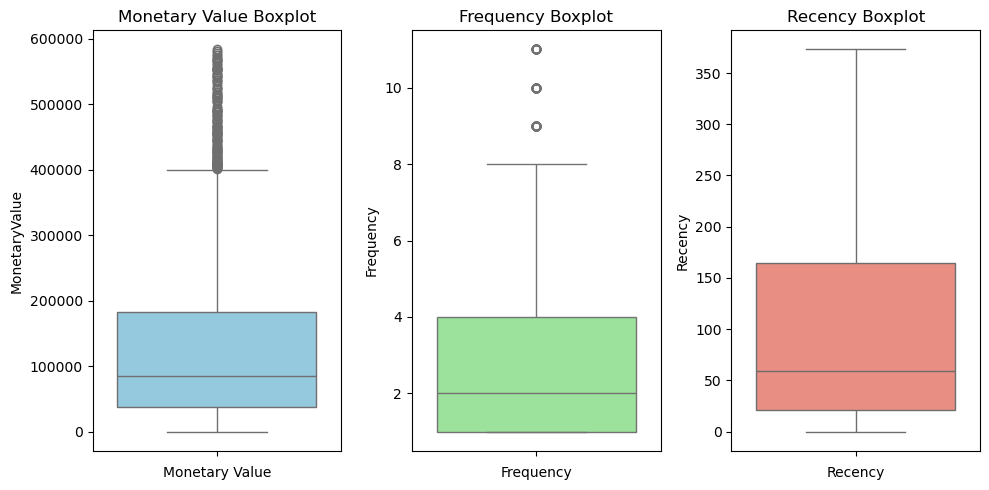

In [28]:
#Using box plot for our non_outlier detection 

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
sns.boxplot(non_outliers_data["MonetaryValue"], color='skyblue')
plt.xlabel("Monetary Value")
plt.title('Monetary Value Boxplot')

plt.subplot(1, 3, 2)
sns.boxplot(non_outliers_data["Frequency"], color='lightgreen')
plt.xlabel("Frequency")
plt.title('Frequency Boxplot')

plt.subplot(1, 3, 3)
sns.boxplot(non_outliers_data["Recency"], color='salmon')
plt.xlabel("Recency")
plt.title('Recency Boxplot')

plt.tight_layout()
plt.show()

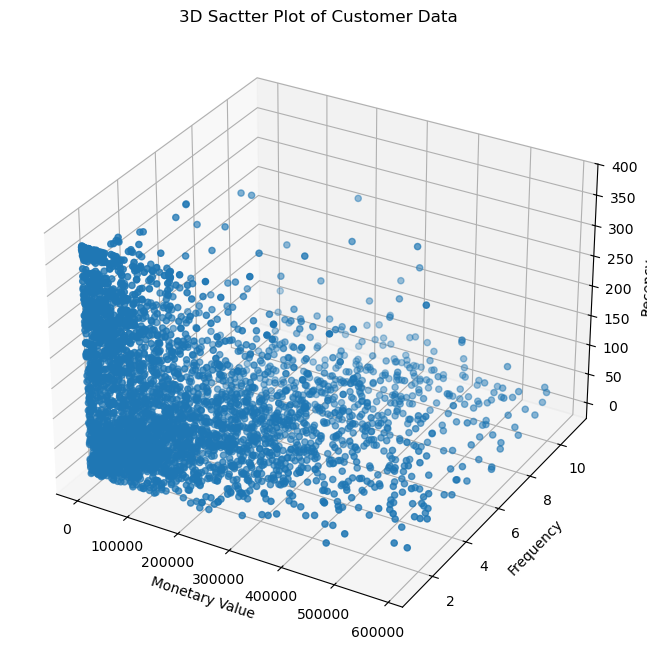

In [29]:
# Plot our data in 3D non-dimentional across Frequency, Recency and Monetary value

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection= "3d")

sactter = ax.scatter(non_outliers_data["MonetaryValue"], non_outliers_data["Frequency"], non_outliers_data["Recency"])

ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency") 

ax.set_title("3D Sactter Plot of Customer Data")

plt.show()

In [30]:
# Standard Scaler is needed to prevent bias towards high magnitude features like Monetary value

scaler = StandardScaler()
scale_data = scaler.fit_transform(non_outliers_data[["MonetaryValue", "Frequency", "Recency"]])
scale_data

array([[-1.00122397, -0.43497897,  2.16607213],
       [ 2.44825813,  1.68589161, -0.97710782],
       [-0.37766611,  0.41336926, -0.26892221],
       ...,
       [-0.83394094, -0.85915309,  0.75940209],
       [-0.75298331, -0.01080486, -0.91890078],
       [ 0.64771767, -0.01080486, -0.57935974]])

In [31]:
scale_data_df = pd.DataFrame(scale_data, index=non_outliers_data.index, columns=("MonetaryValue", "Frequency", "Recency"))

scale_data_df

,MonetaryValue,Frequency,Recency
0,-1.001224,-0.434979,2.166072
1,2.448258,1.685892,-0.977108
2,-0.377666,0.413369,-0.268922
3,0.380749,-0.859153,-0.812188
4,-0.654535,-0.859153,2.010853
...,...,...,...
4366,-0.867674,-0.859153,-0.278623
4367,-0.891424,-0.859153,1.700416
4368,-0.833941,-0.859153,0.759402
4369,-0.752983,-0.010805,-0.918901


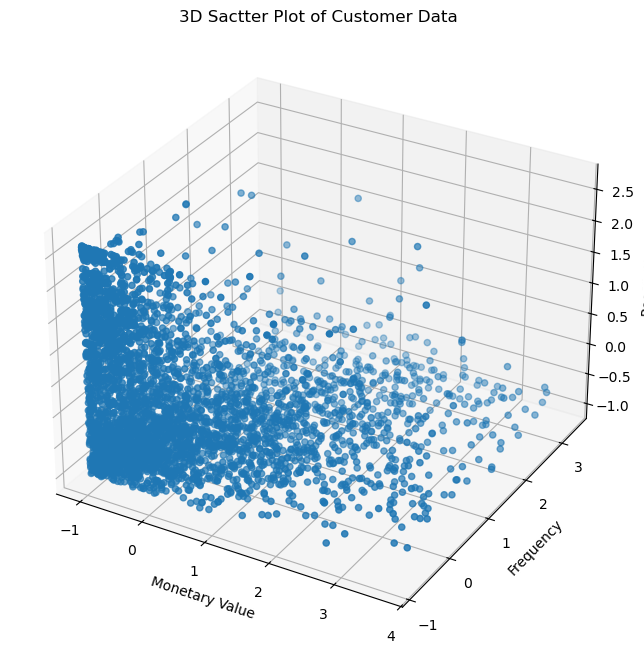

In [32]:
# Plot our Scaled data in 3D non-dimentional across Frequency, Recency and Monetary value

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection= "3d")

sactter = ax.scatter(scale_data_df["MonetaryValue"], scale_data_df["Frequency"], scale_data_df["Recency"])

ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency") 

ax.set_title("3D Sactter Plot of Customer Data")

plt.show()

### KMeans Clustering

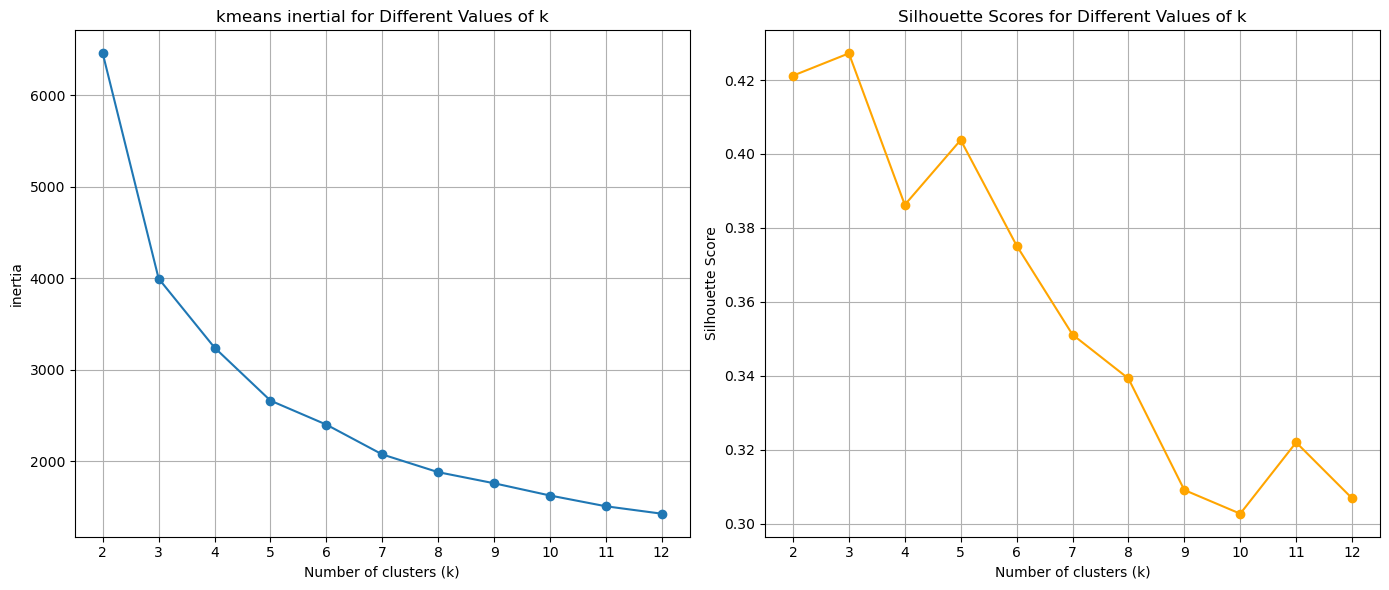

In [76]:
# To determine the number of clusters to assign to our data using the Elbow method

max_k = 12

inertia = []
silhoutte_scores = []
k_values = range(2, max_k +1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    cluster_labels = kmeans.fit_predict(scale_data_df)

    sil_score = silhouette_score(scale_data_df, cluster_labels)

    silhoutte_scores.append(sil_score)
    
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker= 'o')
plt.title('kmeans inertial for Different Values of k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhoutte_scores, marker= 'o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

In [80]:
#Creating Our Model

kmeans = KMeans(n_clusters=5, random_state=42, max_iter=1000)

cluster_labels = kmeans.fit_predict(scale_data_df)

cluster_labels

array([4, 0, 3, ..., 4, 1, 2])

In [82]:
non_outliers_data["Cluster"] = cluster_labels

non_outliers_data

C:\Users\Williams\AppData\Local\Temp\ipykernel_1984\2507996581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_data["Cluster"] = cluster_labels


,CustomerID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346,5342.40,2,2011-01-18 10:17:00,325,4
1,12347,431501.00,7,2011-12-07 15:52:00,1,0
2,12348,82378.47,4,2011-09-25 13:13:00,74,3
3,12349,176075.12,1,2011-11-21 09:51:00,18,1
4,12350,48173.37,1,2011-02-02 16:01:00,309,4
...,...,...,...,...,...,...
4366,18278,21841.57,1,2011-09-27 11:58:00,73,1
4367,18280,18907.36,1,2011-03-07 09:52:00,277,4
4368,18281,26009.01,1,2011-06-12 10:53:00,180,4
4369,18282,36010.74,3,2011-12-02 11:43:00,7,1


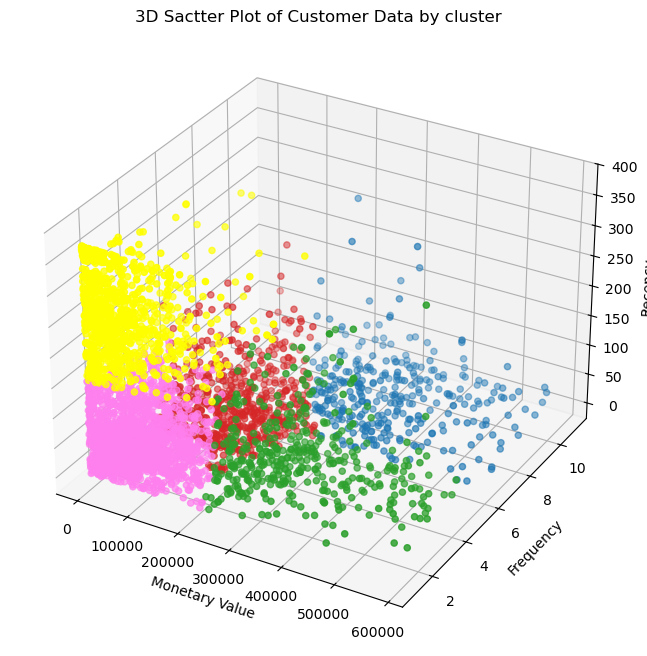

In [88]:

cluster_colors = {0: '#1f77b4', #Blue
                 1: '#ff7fee', #Orange
                 2: '#2ca02c', #Green
                 3: '#d62728', #Red
                 4: '#ffff00'} #Yellow

colors = non_outliers_data['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection= "3d")

sactter = ax.scatter(non_outliers_data["MonetaryValue"], 
                     non_outliers_data["Frequency"], 
                     non_outliers_data["Recency"],
                     c=colors,
                     marker='o')
                    

ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency") 

ax.set_title("3D Sactter Plot of Customer Data by cluster")

plt.show()

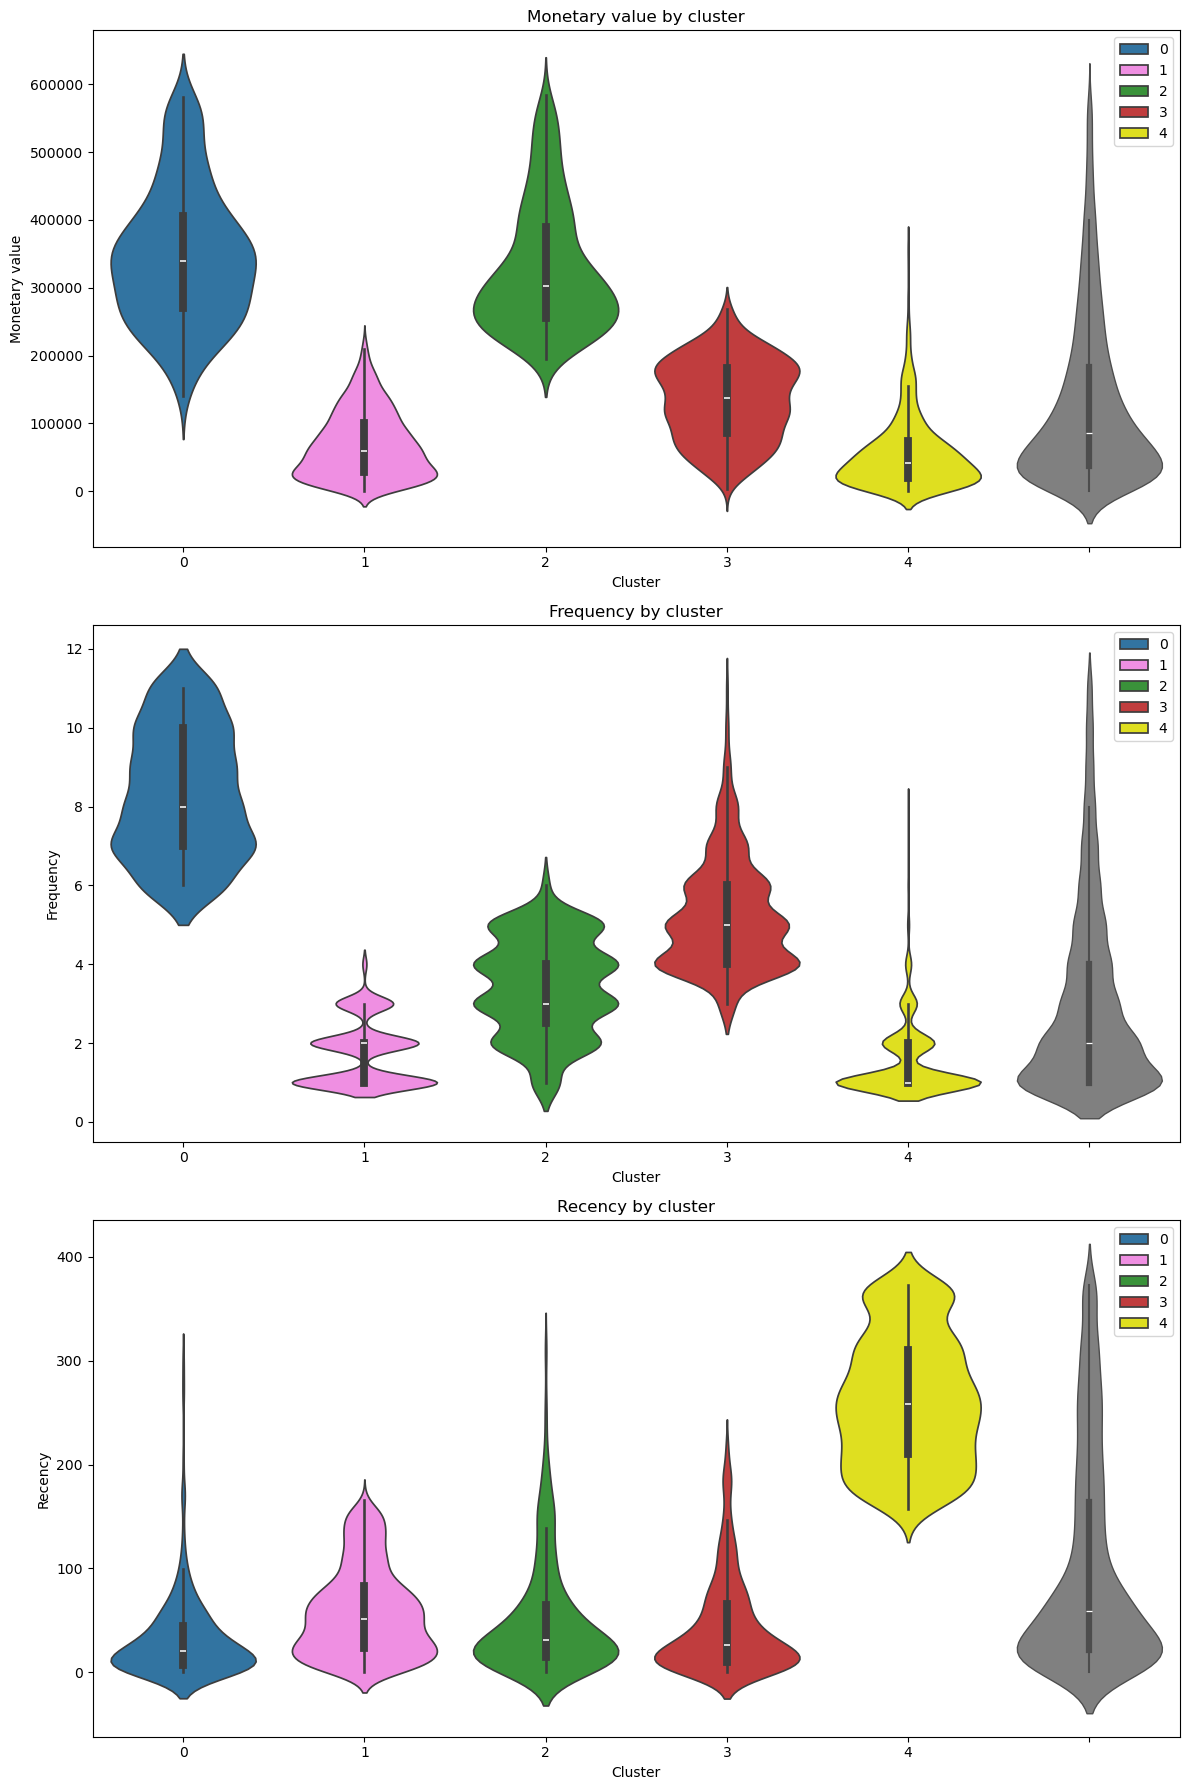

In [90]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_data['Cluster'], y=non_outliers_data['MonetaryValue'], palette=cluster_colors, hue=non_outliers_data['Cluster'])
sns.violinplot(y=non_outliers_data['MonetaryValue'], color='grey', linewidth=1.0)
plt.title('Monetary value by cluster')
plt.ylabel('Monetary value')

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_data['Cluster'], y=non_outliers_data['Frequency'], palette=cluster_colors, hue=non_outliers_data['Cluster'])
sns.violinplot(y=non_outliers_data['Frequency'], color='grey', linewidth=1.0)
plt.title('Frequency by cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_data['Cluster'], y=non_outliers_data['Recency'], palette=cluster_colors, hue=non_outliers_data['Cluster'])
sns.violinplot(y=non_outliers_data['Recency'], color='grey', linewidth=1.0)
plt.title('Recency by cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()